<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px; text-align:center'>Deep Dive into Time Series Analysis Work Book - Part 1</h1>
</div>



__Table of Contents__
1. What is a Time series and why is it important?
2. Examples of Real world Time Series data that matters. 
3. Why Analyzing Time series matters and a must have skill for Data / ML Scientists?
4. Sources of Time Series Data
5. Types of Time series Data
6. Concepts and Hands-On Starts. . .

__Pre-Requisites:__
1. Python Basics for doing hands on
2. Pandas - good to have. Easy to follow, nevertheless.

__Things You will Learn__

1. What is a Time Series, it's commercial importance.
2. Why Every Data Scientist must know Time Series Analysis and Forecasting
3. Econometric Time Series Data and its sources
4. Data wrangling and must have visualization plots for Time Series Analysis
5. Types of Time Series Patterns
6. How to decompose a Time Series into it's components and how to choose the right method
7. Excel workout of Time series decomposition
8. Fully worked out Python examples.

## What is a Time Series?

Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

## Examples of Time Series in the Real World that matter?

1. Stock market prices
2. Demand and Sales Data of various products
3. Website / Store traffic data
4. Weather data
5. Electicity Consumption data
6. Crop Production
7. Macro Economic indices (Interest rate, Gold Price, Crude Oil price, Consumer Price Index (CPI), Whole Sale Price Index (WPI) etc).

## Why Analyzing Time series matters and a must have skill for Data / ML Scientists?

Because it is the preparatory step before you develop a forecast of the series.

Besides, time series forecasting has enormous commercial significance because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.

In order for the business to plan their operations, an accurate forecast of the product demand is necessary. __Being able to analyse Time Series data and scientifically forecast the product demand, forecast expected spike / fall in demand for various promotional / catastrophic events and assigning causality to it is an essential and highly valuable skill Data Scientists are expected to possess.__

## Sources of Time Series Data

1. Proprietary (sales data, product demand, etc)
2. Website Traffic (google, SEO providers)
3. Macro Economic data (World Bank, Gov orgs country specific)

- [Economic Data Sources from University of Minnesota](https://libguides.umn.edu/c.php?g=843682&p=6527336)
- [75 Sources of Macro Economic Data](https://library.law.yale.edu/news/75-sources-economic-data-statistics-reports-and-commentary)
- [FRED](https://fred.stlouisfed.org/), [Bureau of Labour Statistic BLS](https://www.bls.gov/)
- [IHS Markit](https://news.ihsmarkit.com/)

## Types of Time Series Data

1. Univariate Time Series
2. Panel Data

The series may also be categorised based on the frequency of the data: sec, min, hour, days, week, months, quarter, years.

## __How to import time series in python?__

Most common method is to simply use the pandas library

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import warnings
warnings.filterwarnings('ignore')


# Import as Dataframe: Australian Drug Sales
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


__Import it as a series__

In [2]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


__Example of Panel Data__

In [3]:
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## __Visualizing a Time Series__

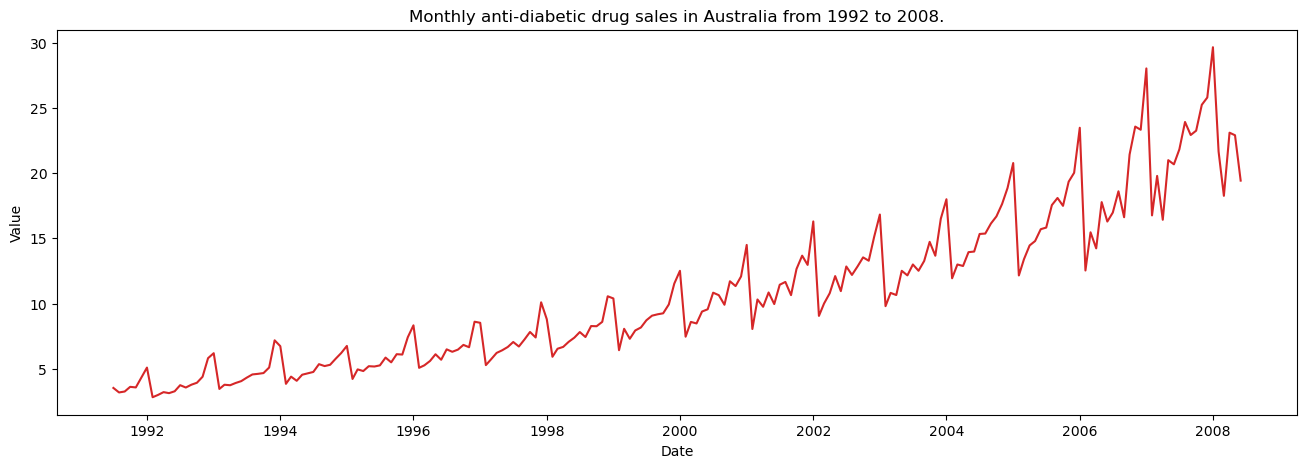

In [4]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

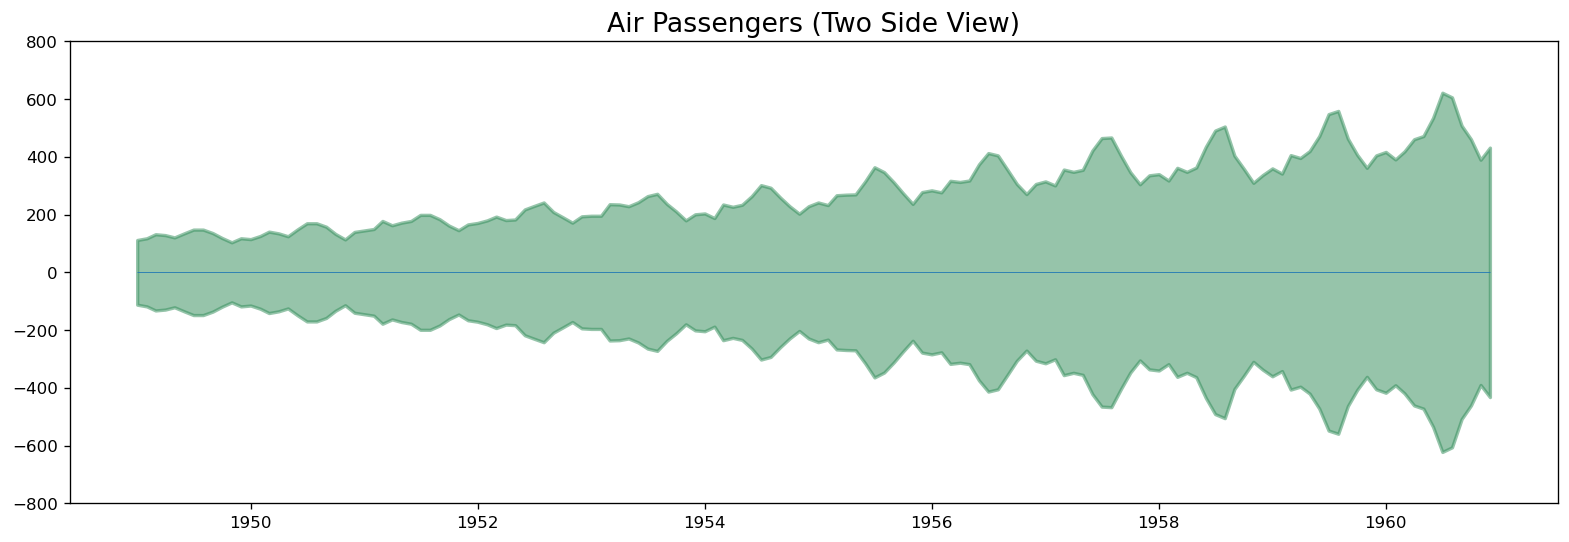

In [5]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

## __Seasonal Plot of a Time Series__

Very convenient to visualize if this seasons (years) pattern is conforming with the history. 

This is very useful for __Post-forecast analysis__ as well when you receive the actual data. 

__How?__

If your actual data is way different from what has happened in the past years, you will know that your forecasts are not to be blamed, but rather there could be some external factor that needs to be included in the forecast model. 

We will learn about these in detail when we learn forecasting techniques with time series in a future session.

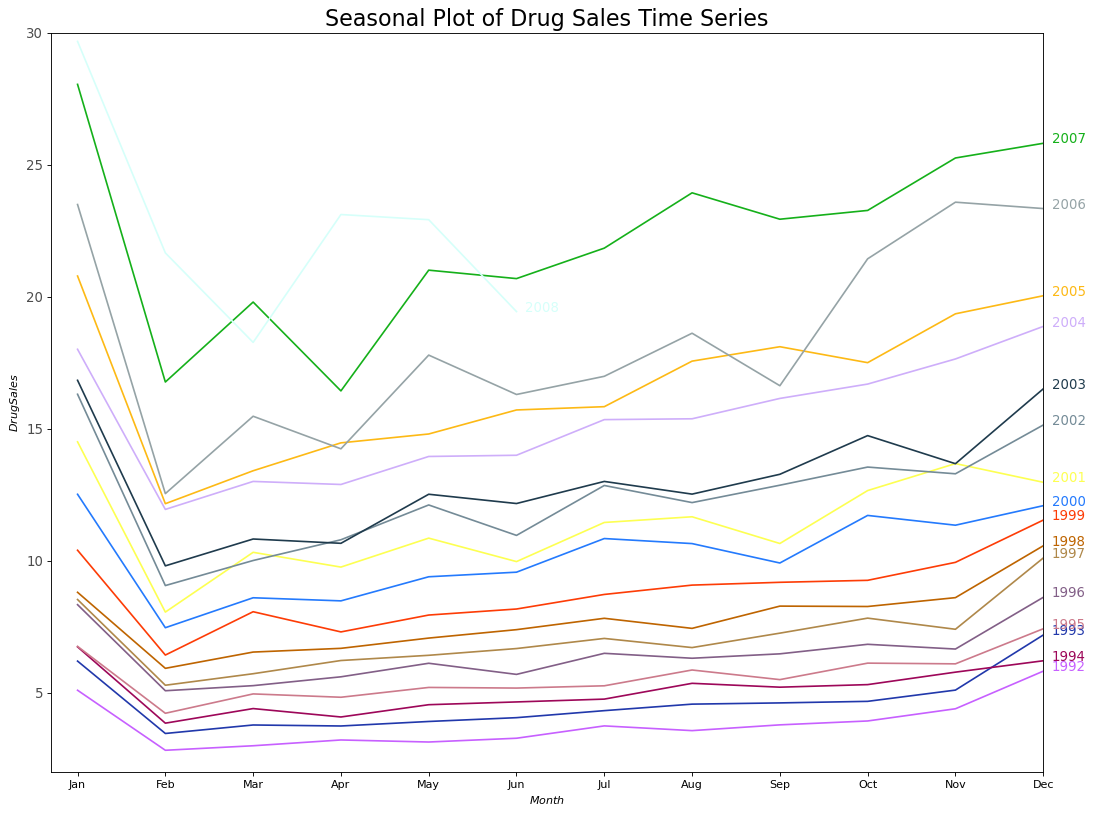

In [6]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

## __Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution__

This an help to understand the growth in the pattern over long term and the deviation in pattern over shorter time periods.

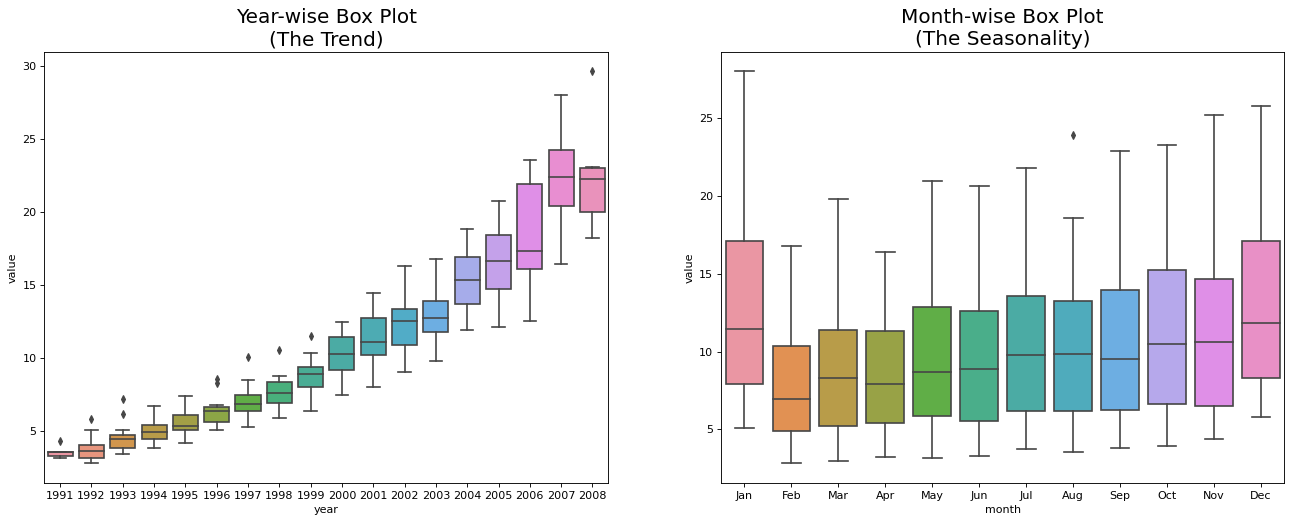

In [7]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## __Patterns in a Time Series__

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

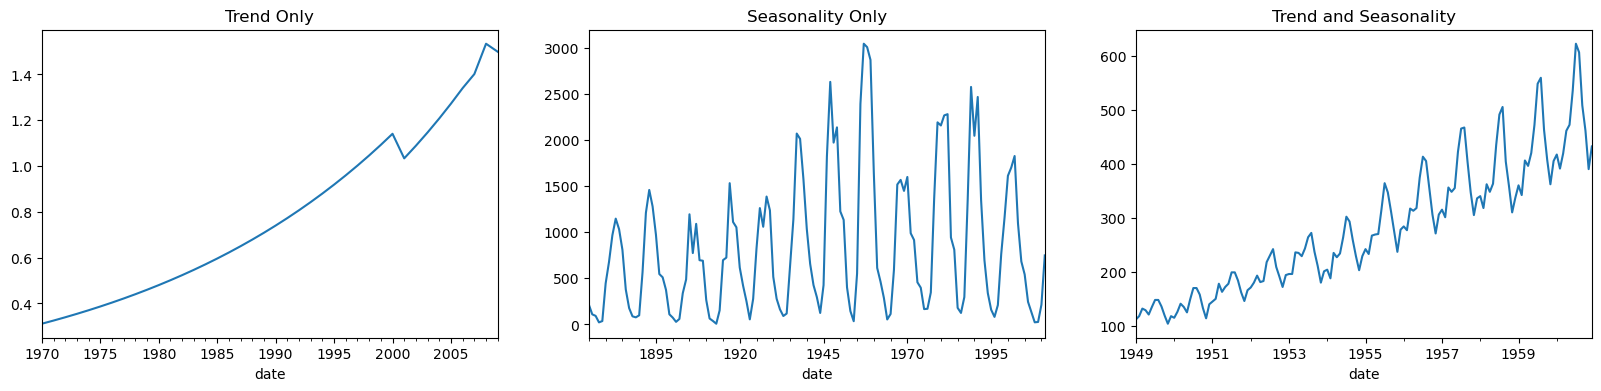

In [8]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

## __What is Cyclic Pattern vs Seasonal Pattern and how to differentiate between them?__

Another aspect to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse ‘cyclic’ effect with ‘seasonal’ effect.

So, How to diffentiate between a ‘cyclic’ vs ‘seasonal’ pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## __How to decompose a time series into its components?__

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

__Additive time series:__

Value = Base Level + Trend + Seasonality + Error

__Multiplicative Time Series:__

Value = Base Level x Trend x Seasonality x Error

In [9]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
print("statsmodels version:", statsmodels.__version__)

statsmodels version: 0.13.2


__Import the data__

----------------


Text(0.5, 0.98, 'Additive Decompose')

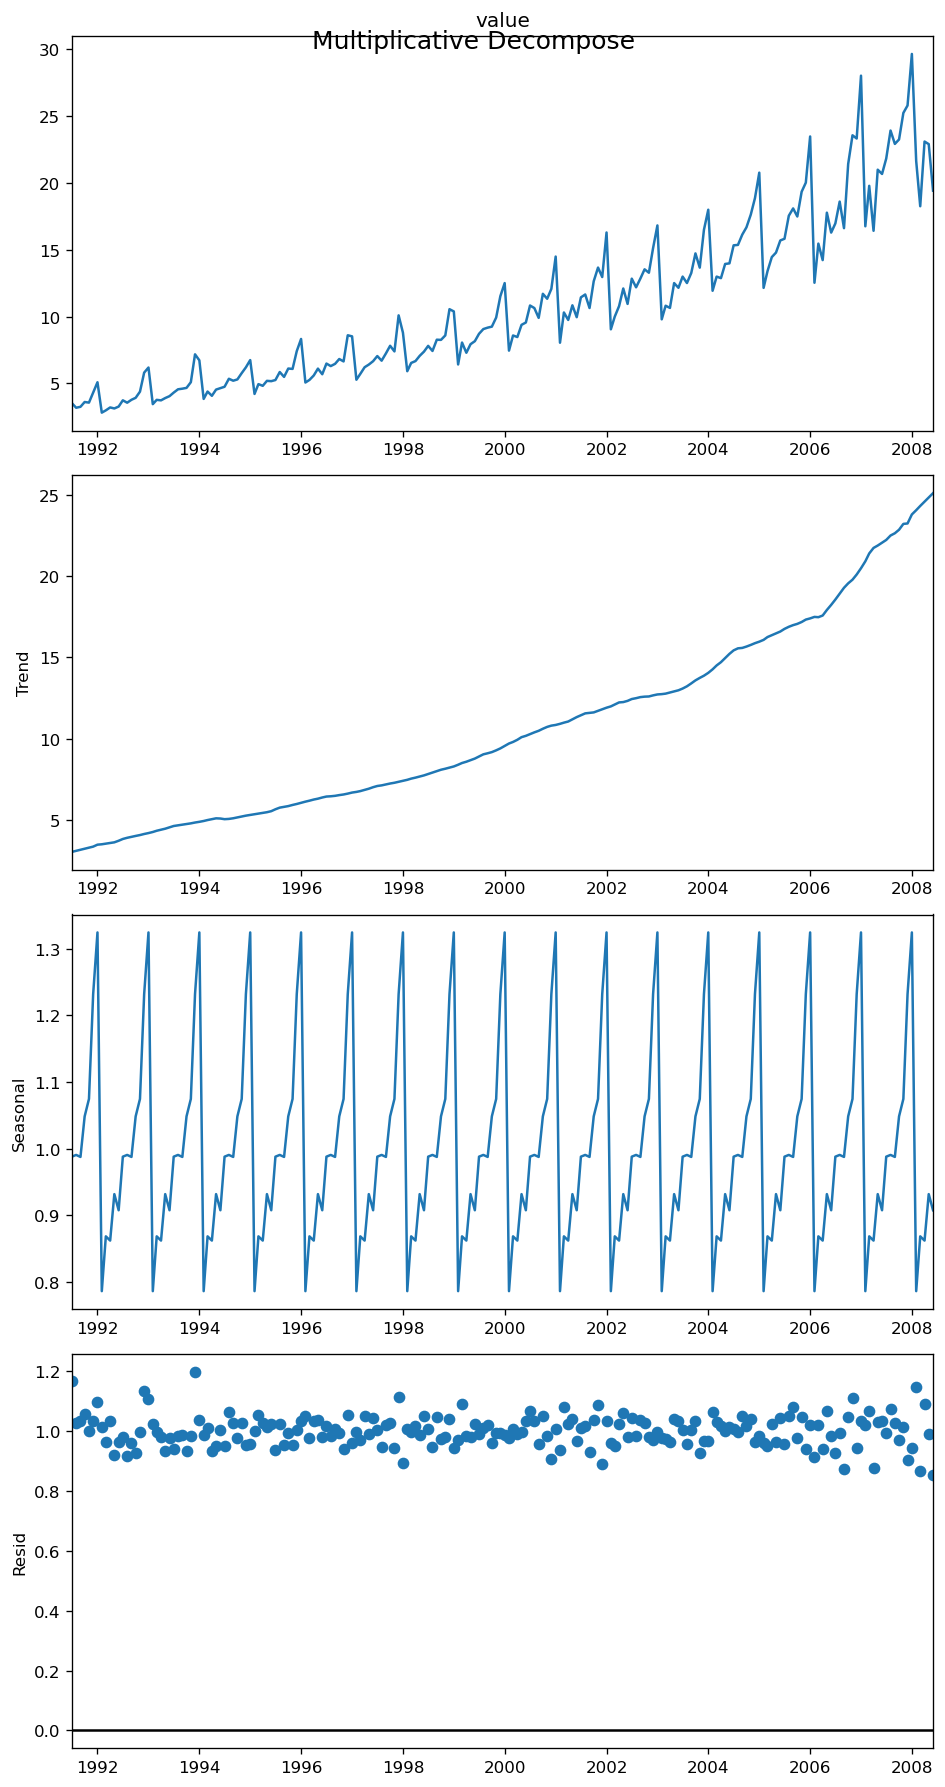

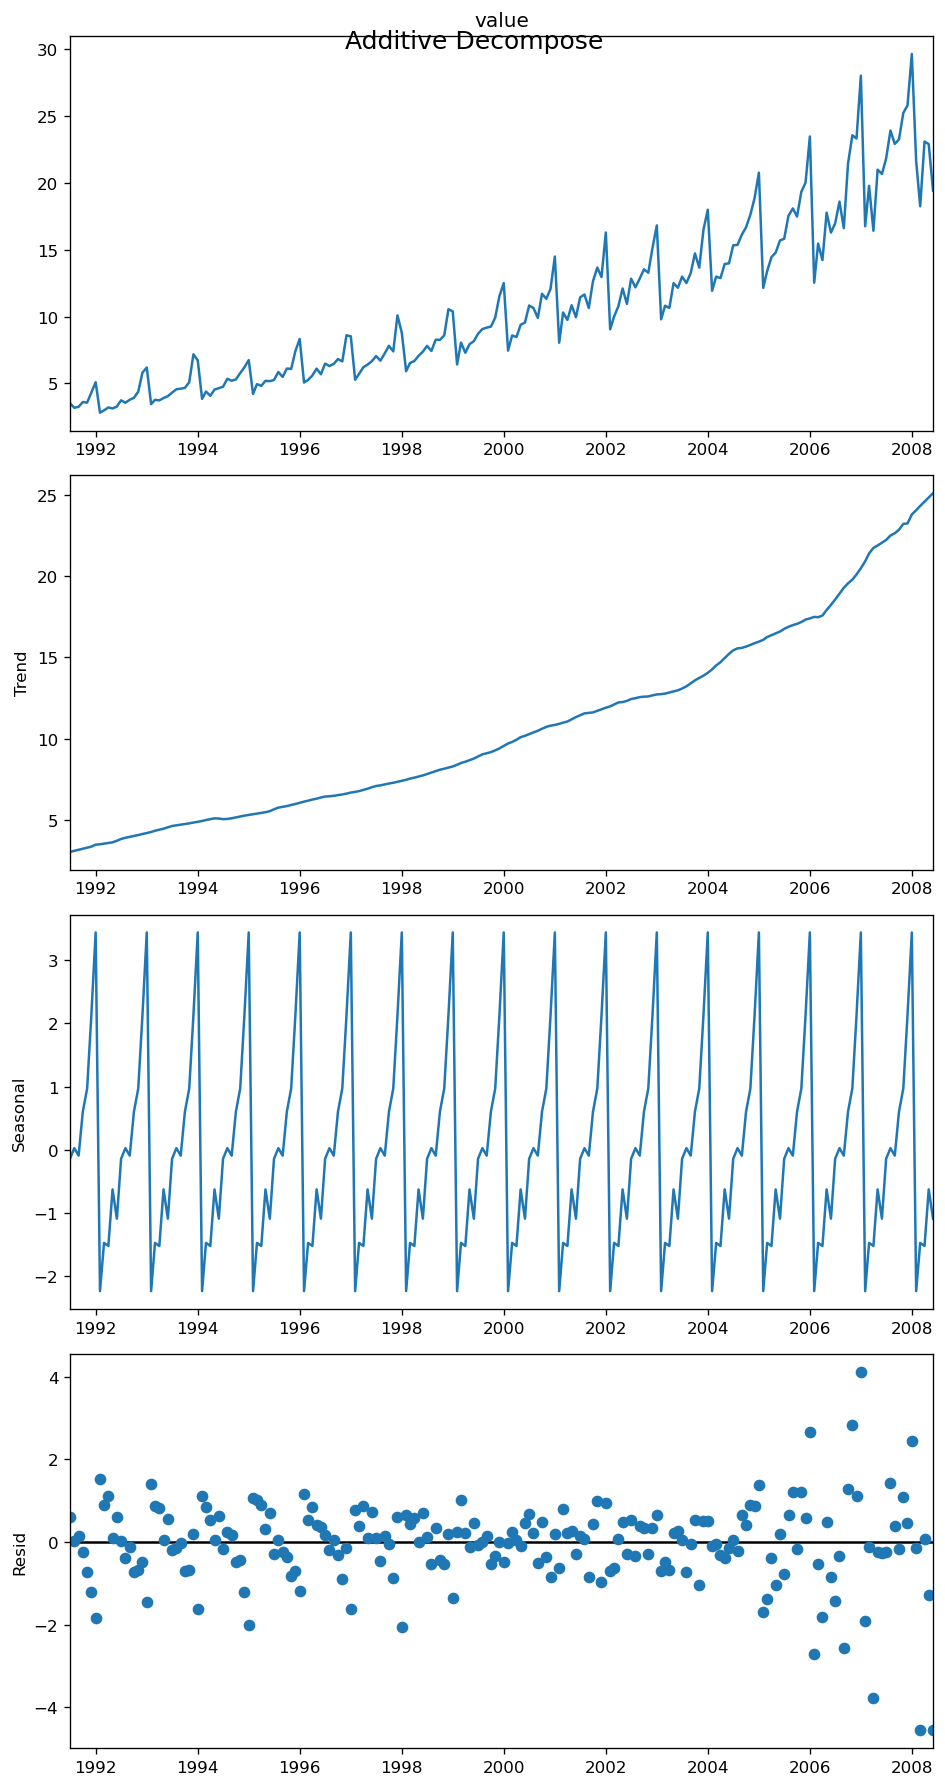

In [10]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,15)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
print("----------------")
result_add.plot().suptitle('Additive Decompose', fontsize=15)
# plt.show()

__Extract the components__

In [11]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869
